In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
np.random.seed(5019772)

In [3]:
def fit(x,a,b,c):
    return a*np.exp(-x*np.log(2)/b)+c

## All muons are created at t=0, with half life of $t_h=1s$

In [4]:
N = 50_000
bins = 5000
t_half = np.random.exponential(2.2/np.log(2),N)

### Create Histogram

In [5]:
y,x=np.histogram(t_half, bins=bins)
x = x[:-1] + (x[1]-x[0])/2

### Plot Histogram and fit it

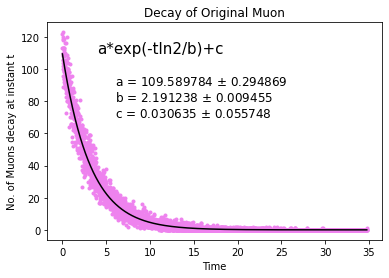

In [6]:
plt.plot(x,y,ls ='',marker='.',color='violet',label='Data Points')
pov,pocv = curve_fit()
plt.plot(x,fit(x,*pov),color='black',label='Fit')
plt.text(4,110,r"a*exp(-tln2/b)+c",fontsize=15)
plt.text(6,90,r"a = %f $\pm$ %f "%(pov[0],pocv[0][0]**0.5),fontsize=12)
plt.text(6,80,r"b = %f $\pm$ %f "%(pov[1],pocv[1][1]**0.5),fontsize=12)
plt.text(6,70,r"c = %f $\pm$ %f "%(pov[2],pocv[2][2]**0.5),fontsize=12)
plt.xlabel('Time')
plt.ylabel('No. of Muons decay at instant t')
plt.title('Decay of Original Muon')
plt.savefig('original_muon_decay.png')
plt.show()

## Now muons are collected in the detector at random time t

In [7]:
t = np.random.uniform(0.01,14,N)
new_half_life = (t_half-t)[t_half>t]


### Create histogram

In [8]:
bins//=5
y1,x1=np.histogram(new_half_life, bins=bins)
x1 = x1[:-1] + (x1[1]-x1[0])/2

### Plot histogram and fit it

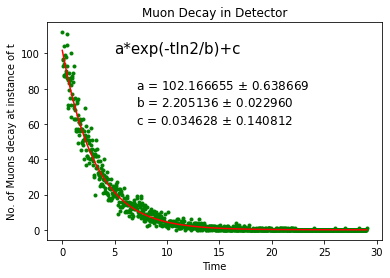

In [9]:
plt.plot(x1,y1,ls ='',marker='.',color='green',label='Data Points')
pov,pocv = curve_fit(fit,x1,y1)
plt.plot(x1,fit(x1,*pov),color='red',label='Fit')
thalf=pov[1]*np.log(2),"+/-",pocv[1][1]**0.5*np.log(2)
plt.text(5,100,r"a*exp(-tln2/b)+c",fontsize=15)
plt.text(7,80,r"a = %f $\pm$ %f "%(pov[0],pocv[0][0]**0.5),fontsize=12)
plt.text(7,70,r"b = %f $\pm$ %f "%(pov[1],pocv[1][1]**0.5),fontsize=12)
plt.text(7,60,r"c = %f $\pm$ %f "%(pov[2],pocv[2][2]**0.5),fontsize=12)
plt.xlabel('Time')
plt.ylabel('No. of Muons decay at instance of t')
plt.title('Muon Decay in Detector')
plt.savefig('detector_muon_decay.png')
plt.show()